In [26]:
!git clone https://github.com/bmd1905/vietnamese-ocr

Cloning into 'vietnamese-ocr'...


In [32]:
%cd vietnamese-ocr

[WinError 2] The system cannot find the file specified: 'vietnamese-ocr'
C:\tkdong\ThacSik29\ThucTap\dict-guided\vietnamese-ocr\vietnamese-ocr


In [37]:
pip install -r requirement.txt

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip list

Package                 Version      Editable project location
----------------------- ------------ ---------------------------------------------------------------------------------------------
absl-py                 2.0.0
AdelaiDet               0.2.0        c:\users\msi\anaconda3\envs\dict-guided\lib\site-packages\adelaidet-0.2.0-py3.7-win-amd64.egg
antlr4-python3-runtime  4.9.3
anyio                   3.7.1
argon2-cffi             23.1.0
argon2-cffi-bindings    21.2.0
astor                   0.8.1
attrdict                2.0.1
attrs                   23.2.0
Babel                   2.14.0
backcall                0.2.0
bce-python-sdk          0.8.98
beautifulsoup4          4.12.2
black                   23.3.0
bleach                  6.0.0
cachetools              5.3.2
certifi                 2022.12.7
cffi                    1.15.1
charset-normalizer      3.3.2
click                   8.1.7
cloudpickle             2.2.1
colorama                0.4.6
cssselect               1.2.0
css

In [70]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from paddleocr import PaddleOCR

import torch




from paddleocr import PaddleOCR, draw_ocr


import difflib
import re
import math
import copy



In [46]:
from vietocr.vietocr.tool.predictor import Predictor
from vietocr.vietocr.tool.config import Cfg

In [166]:
FONT = './PaddleOCR/doc/fonts/latin.ttf'
def predict(recognitor, detector, img_path, save_path, padding=4, dpi=100):
    # Load image
    img = cv2.imread(img_path)

    # Text detection
    result = detector.ocr(img_path, cls=False, det=True, rec=False)
    result = result[:][:][0]

    # Filter Boxes
    boxes = []
    for line in result:
        boxes.append([[int(line[0][0]), int(line[0][1])], [int(line[2][0]), int(line[2][1])]])
    boxes = boxes[::-1]

    # Add padding to boxes
    padding = 4
    for box in boxes:
        box[0][0] = box[0][0] - padding
        box[0][1] = box[0][1] - padding
        box[1][0] = box[1][0] + padding
        box[1][1] = box[1][1] + padding

    # Text recognizion
    texts = []
    for box in boxes:
        cropped_image = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]
        try:
            cropped_image = Image.fromarray(cropped_image)
        except:
            continue

        rec_result = recognitor.predict(cropped_image)

        text = rec_result#[0]

        texts.append(text)
        #print(text)

    # Convert boxes to draw
    def get_rectangle_points(x1, y1, x2, y2):
        x_tl = x1
        y_tl = y2
        x_br = x2
        y_br = y1
        return [(x1, y1), (x2, y1), (x2, y2), (x1, y2)]
    _boxes = [get_rectangle_points(boxe[0][0], boxe[0][1], boxe[1][0], boxe[1][1]) for boxe in boxes]

    # Draw boxes and texts
    img = draw_ocr(img, _boxes, texts, scores=None, font_path=FONT)


    # Save image
    img_name = img_path.split('/')[-1]
    cv2.imwrite(os.path.join(save_path, img_name), img)

    # Display image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    height, width, depth = img.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(img, cmap='gray')

    plt.show()

    return boxes, texts

def display_image_in_actual_size(img_path, dpi=200):
  im_data = cv2.imread(img_path)

  height, width, depth = im_data.shape

  # What size does the figure need to be in inches to fit the image?
  figsize = width / float(dpi), height / float(dpi)

  # Create a figure of the right size with one axes that takes up the full figure
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0, 0, 1, 1])

  # Hide spines, ticks, etc.
  ax.axis('off')

  # Display the image.
  ax.imshow(im_data, cmap='gray')

  plt.show()

In [167]:
# Config of PaddleOCR
detector = PaddleOCR(use_angle_cls=False, lang="vi", use_gpu=True)

[2024/01/05 00:36:01] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\MSI/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\MSI/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0

In [168]:
# Configure of VietOCR
config = Cfg.load_config_from_name('vgg_transformer')
# config = Cfg.load_config_from_file('vietocr/config.yml')
# config['weights'] = '/Users/bmd1905/Desktop/pretrain_ocr/vi00_vi01_transformer.pth'

config['cnn']['pretrained'] = True
config['predictor']['beamsearch'] = True
config['device'] = 'cuda:0' # mps

recognitor = Predictor(config)

Model weight C:\Users\MSI\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


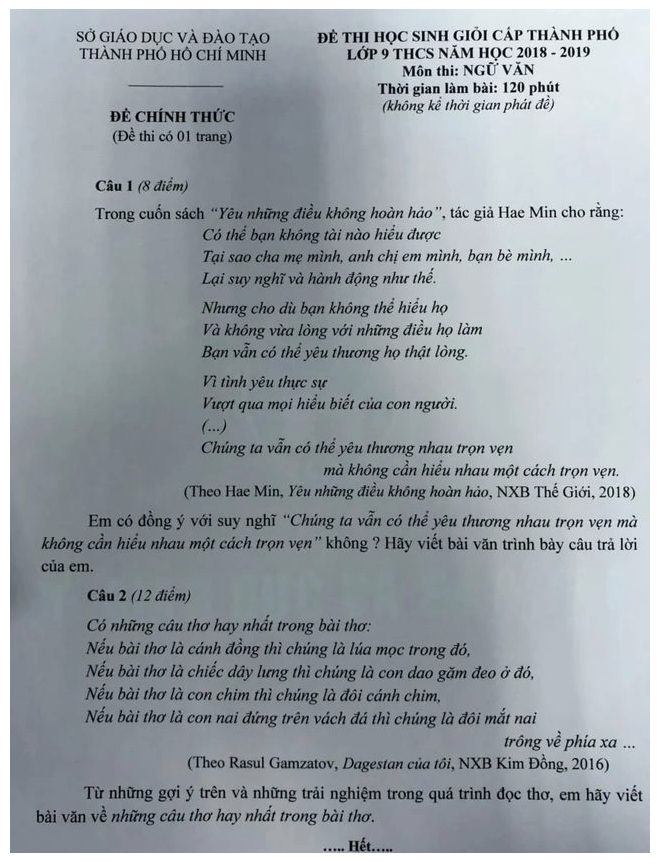

''

In [169]:

img_path = 'C:/tkdong/ThacSik29/ThucTap/dict-guided/vietnamese-ocr/testA/devan7.jpg'

img = cv2.imread(img_path)
img = Image.fromarray(img)
rec_result = recognitor.predict(img)

display_image_in_actual_size(img_path, dpi=100)

rec_result

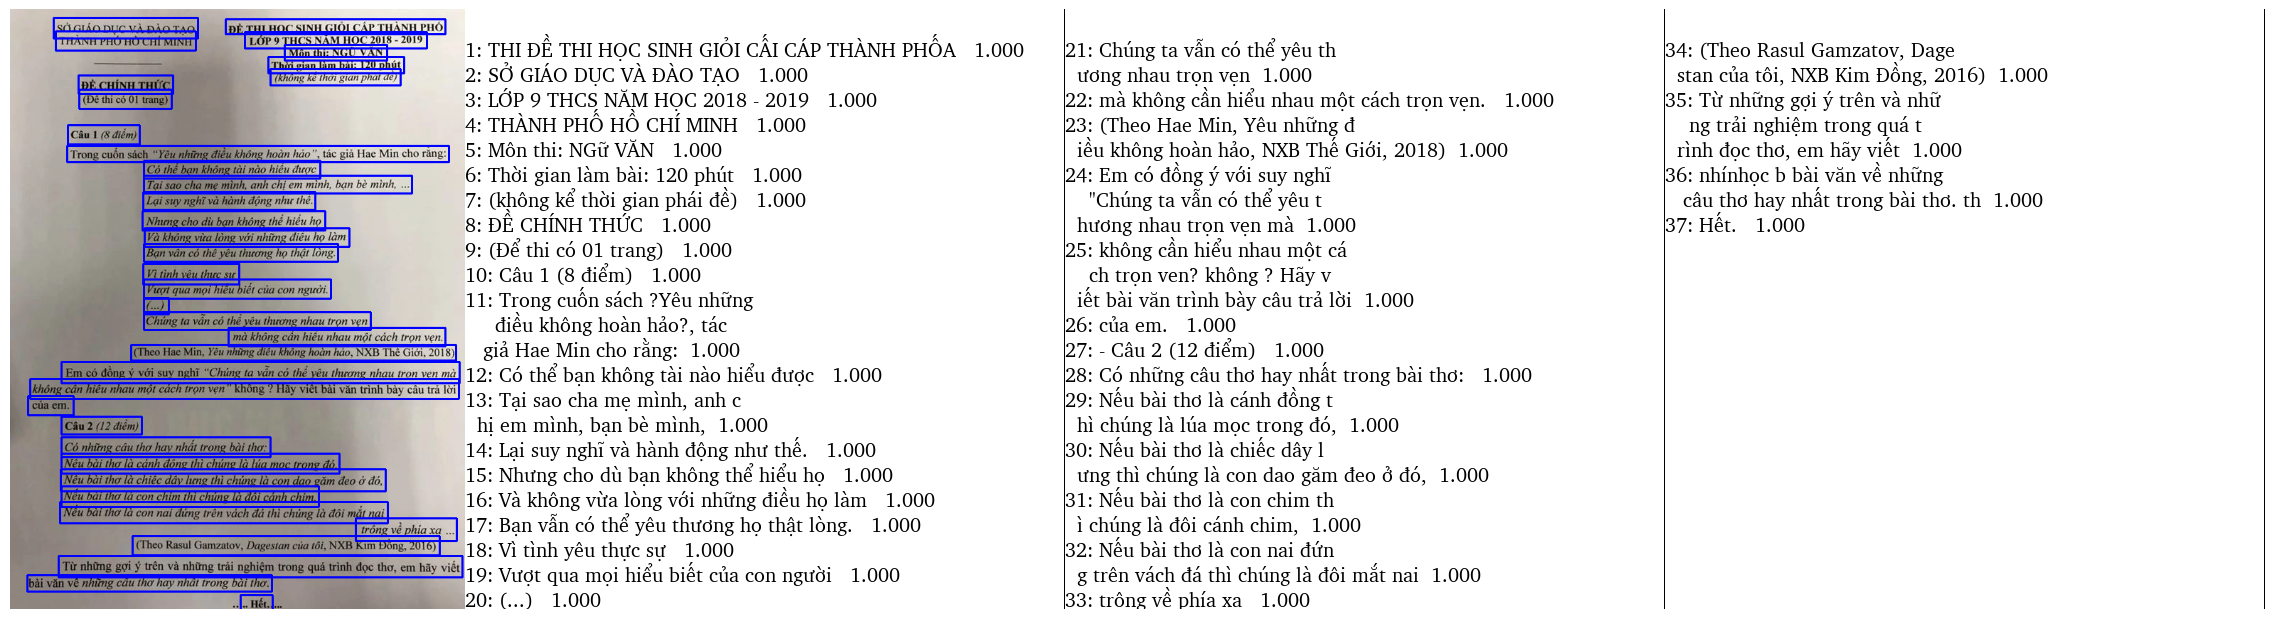

In [172]:
input_path = 'C:/tkdong/ThacSik29/ThucTap/dict-guided/vietnamese-ocr/testA/devan7.jpg'
output_path = './output'

# Predict
boxes, texts = predict(recognitor, detector, input_path, output_path, padding=2, dpi=100)

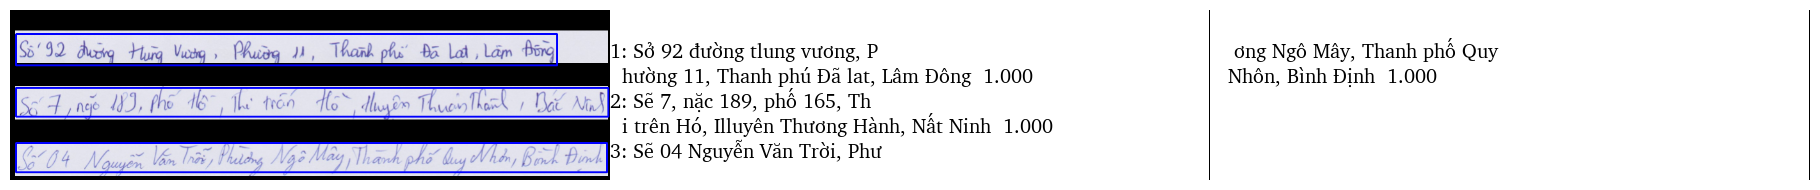

In [174]:
input_path = 'C:/tkdong/ThacSik29/ThucTap/dict-guided/vietnamese-ocr/testA/img_10.png'
output_path = './output'

# Predict
boxes, texts = predict(recognitor, detector, input_path, output_path, padding=2, dpi=100)

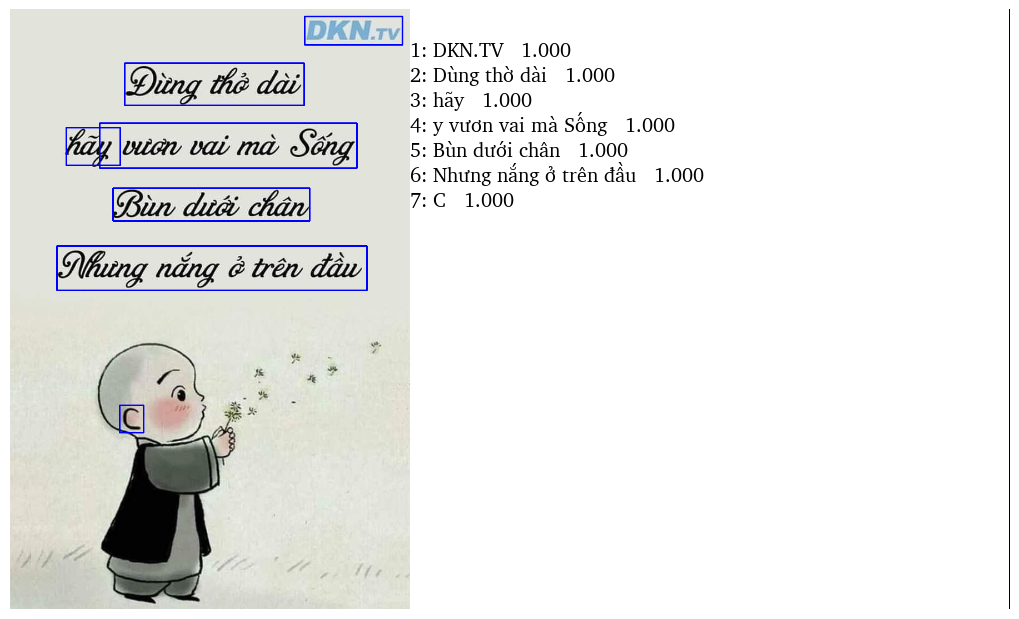

In [175]:
input_path = 'C:/tkdong/ThacSik29/ThucTap/dict-guided/vietnamese-ocr/testA/img28.jpg'
output_path = './output'

# Predict
boxes, texts = predict(recognitor, detector, input_path, output_path, padding=2, dpi=100)

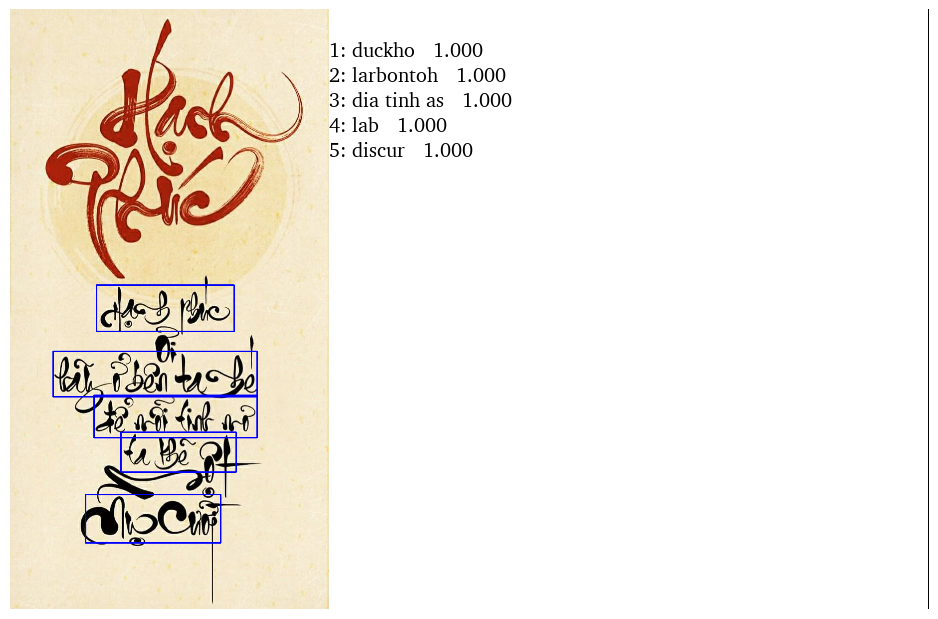

In [176]:
input_path = 'C:/tkdong/ThacSik29/ThucTap/dict-guided/vietnamese-ocr/testA/img39.jpg'
output_path = './output'

# Predict
boxes, texts = predict(recognitor, detector, input_path, output_path, padding=2, dpi=100)

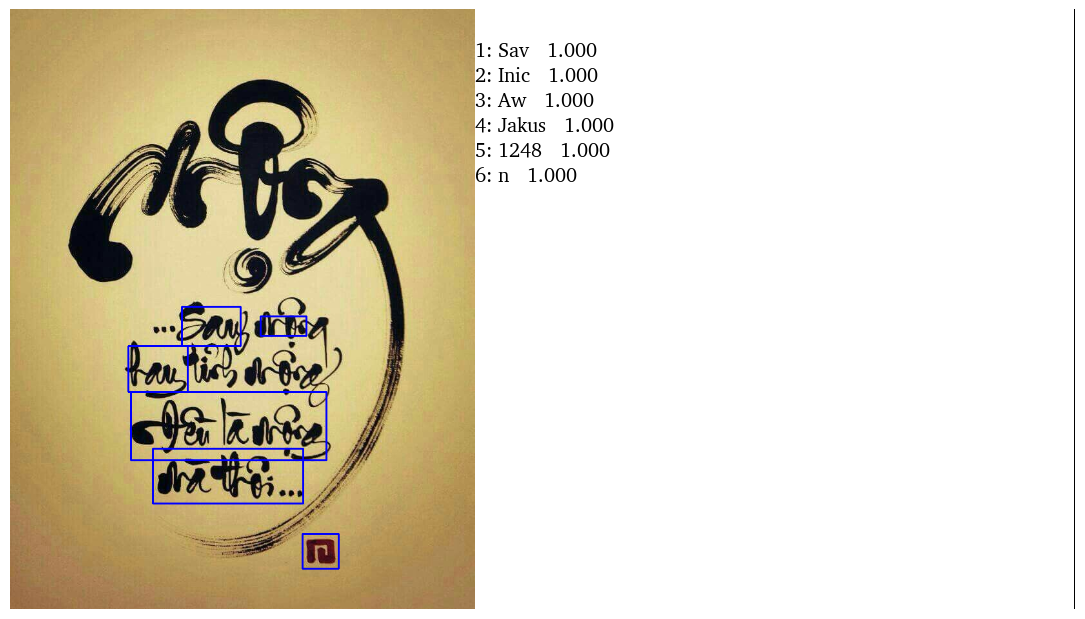

In [177]:
input_path = 'C:/tkdong/ThacSik29/ThucTap/dict-guided/vietnamese-ocr/testA/img27.jpg'
output_path = './output'

# Predict
boxes, texts = predict(recognitor, detector, input_path, output_path, padding=2, dpi=100)